In [14]:
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/iterative_alternative/analyze_mecp2_cpg_enrichment')


In [ ]:
# Read the input file
df_serial = pd.read_csv('mecp2_cpg_enrichment/mecp2_cpg_enrichment.csv')
print(f"Total regions: {len(df_serial)}")


In [ ]:
np.sum(df_serial['significant'])

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df_serial['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

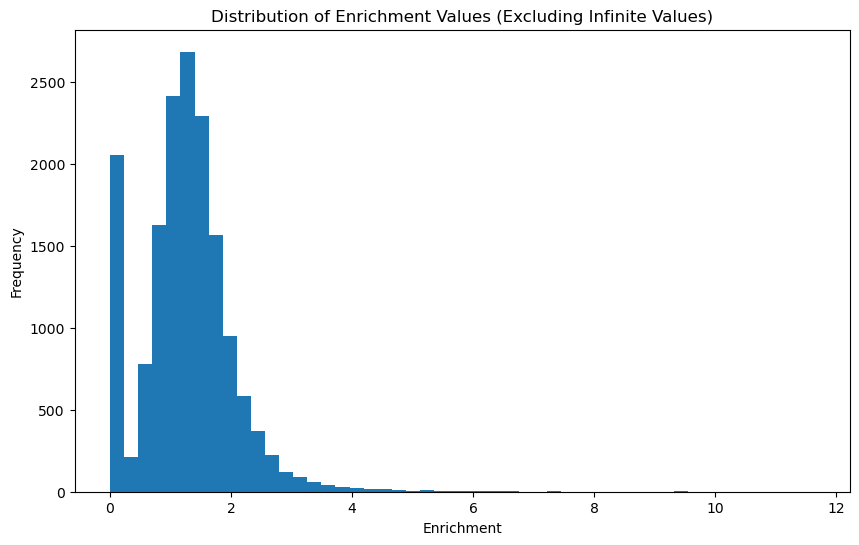

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [21]:
df_serial.loc[df_serial['enrichment'] == float('inf'), 'enrichment'] = 10

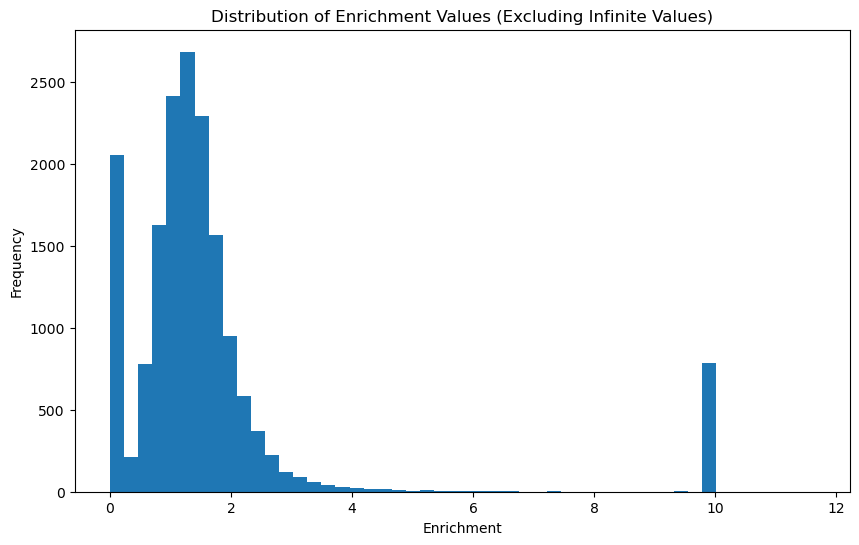

In [22]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [ ]:
df_serial['exo_signal']

In [ ]:
df_serial.sort_values('enrichment', ascending=False)

In [ ]:


# Get list of all chunk files
chunk_files = glob.glob('mecp2_cpg_enrichment_parallel/chunk_*.csv')
# Read and concatenate all chunks
df = pd.concat([pd.read_csv(f) for f in chunk_files], ignore_index=True)

# Sort by chromosome and start position
df = df.sort_values(['chr', 'start'])

print(f"Total regions analyzed: {len(df)}")
